## Project Objective:
We'll implement the k-means clustering algorithm to segment mall customer base, and thus promote more targeted marketing campaigns.

## Workflow:
1. Data Collection
2. Data Pre-Processing
3. Data Analysis
4. Optimum number of Clusters
5. Model Training: K-Means Clustering
6. Visualizing the Clusters

### Importing the Dependencies

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder

### Data Collection & Analysis

In [4]:
# loading the data from csv file to Pandas Dataframe
customer_data = pd.read_csv('datasets/Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.shape

(200, 5)

In [7]:
# getting more information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing the Annual Income Column & Spending Score Column for Clustering

In [10]:
X = customer_data.iloc[:, [3, 4]].values

In [11]:
X.shape

(200, 2)

In [13]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

### Choosing the optimum number of Clusters

Method: WCSS (Within Cluster Sums of Squares)

In [15]:
# finding wcss value for different number of clusters
import warnings
warnings.filterwarnings("ignore")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25036.417604033984,
 21916.794789843727,
 20072.070939404006]

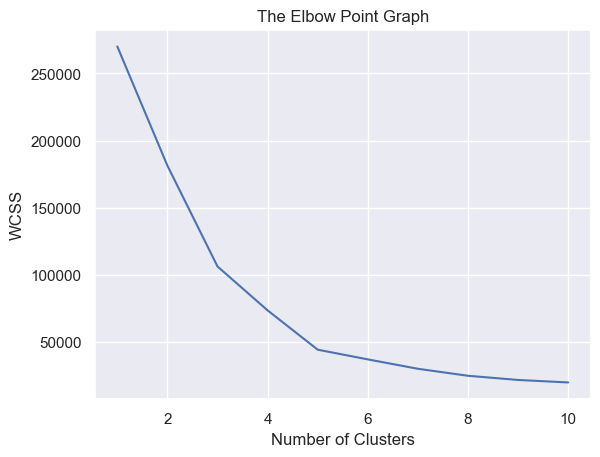

In [17]:
# plot an elbow graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

So our optimum number of clusters is 5

### Training the k-Means Clustering Model

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

In [19]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Visualizing all the Clusters

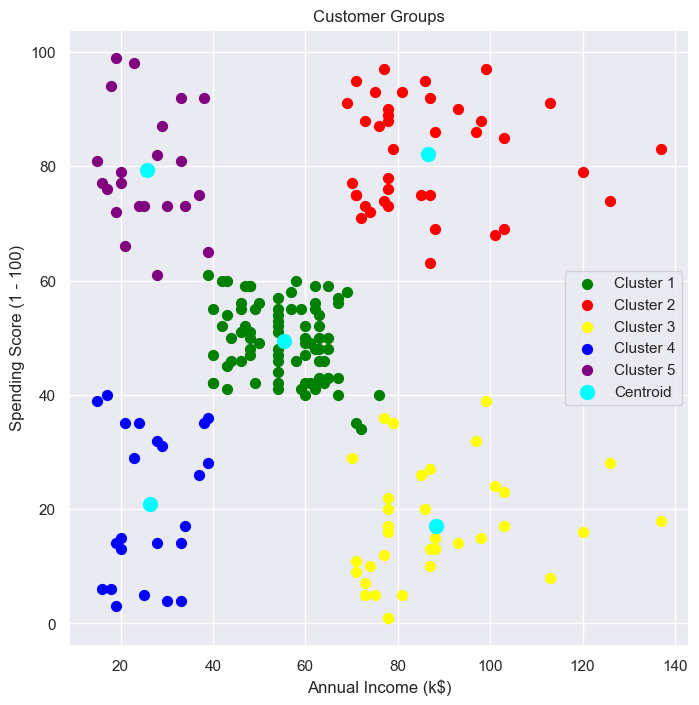

In [49]:
# plotting all the clusters and their centroids
plt.figure(figsize = (8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s= 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s= 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s= 50, c = 'blue', label = 'Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s= 50, c = 'purple', label = 'Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()

plt.show()

### Next Steps
We can make business decisions and lead more targeted marketing campaigns based on the above segmentation of customer base. 

### What if we consider all columns (that is, including gender and age) for clustering?

In [33]:
# Given that the Gender column is string, let's first convert it to float
encoder = LabelEncoder()

In [34]:
# make a copy of the original customer data
customer_data_copy = customer_data

In [35]:
customer_data_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
# label encoding
customer_data_copy['Gender'] = encoder.fit_transform(customer_data_copy['Gender'])
customer_data_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [37]:
# including age and gender
X_all = customer_data_copy.iloc[:, [1, 2, 3, 4]].values

In [38]:
X_all[:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]], dtype=int64)

In [39]:
X_all.shape

(200, 4)

In [40]:
# choose the optimum number of clusters using WCSS
wcss_all = []
for i in range(1, 11):
    kmeans_all = KMeans(n_clusters = i, init = 'k-means++', random_state = 7)
    kmeans_all.fit(X_all)
    wcss_all.append(kmeans_all.inertia_)

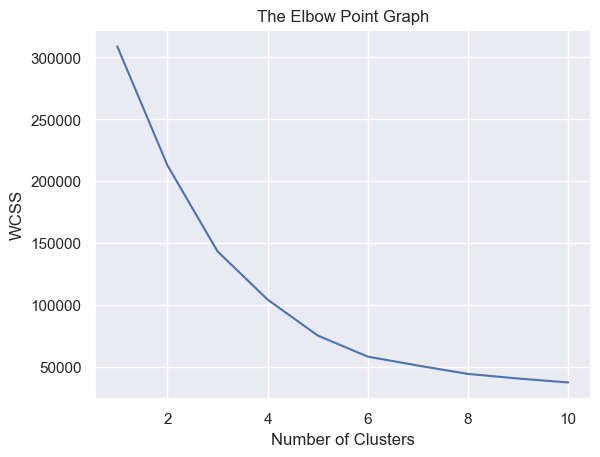

In [41]:
# plot an elbow graph
sns.set()
plt.plot(range(1, 11), wcss_all)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We'll still choose 5 as the optimum number of clusters.

In [42]:
# model training and visualization
kmeans_all = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y_all = kmeans_all.fit_predict(X_all)

In [43]:
Y_all

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [48]:
customer_data_copy.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [47]:
kmeans_all.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

In [57]:
labels = kmeans_all.labels_
clusterCount = np.bincount(labels)
clusterCount

array([23, 39, 79, 23, 36], dtype=int64)

The statistical output shows that K means clustering has created the following 5 sets with a different number of data points in each:

- Cluster1: 23
- Cluster2: 39
- Cluster3: 79
- Cluster2: 23
- Cluster3: 36

#### We know each set contains similar businesses, but how do we characterize them? 

To do that, we need to look at the **Cluster Centroids**. 

The output shows that Cluster 1 contains middle-aged people with lower income and lower spending score. Cluster 2 mainly includes young people with very high income and very high spending score. Cluster 3’s centroid means middle-aged people with higher income and higher spending score. Cluster 4 shows younger people with low income but high spending score. And Cluster 5 indicates middle-aged people with high income but low spending score. 

We can describe the groups as the following:

- Cluster 1: Middle-aged, low earners, spend little.
- Cluster 2: Young, very rich, big spenders.
- Cluster 3: Middle-aged, rich, spend a lot.
- Cluster 4: Young, low earners, yet spend a lot.
- Cluster 5: Middle-aged, rich, but frugal.

Frequently, examples of K means clustering use two variables that produce two-dimensional groups, which makes graphing easy. 

Here we are using four variables, making the groups four-dimensional. 

We can’t graph them all on a single plot -- this complexity highlights the value of using an algorithm to create the sets. 

We'll plot a pair of variables on a scatterplot to help see the clusters. Consequently, this graph is a *two-dimensional slice* of a four-dimensional space. 


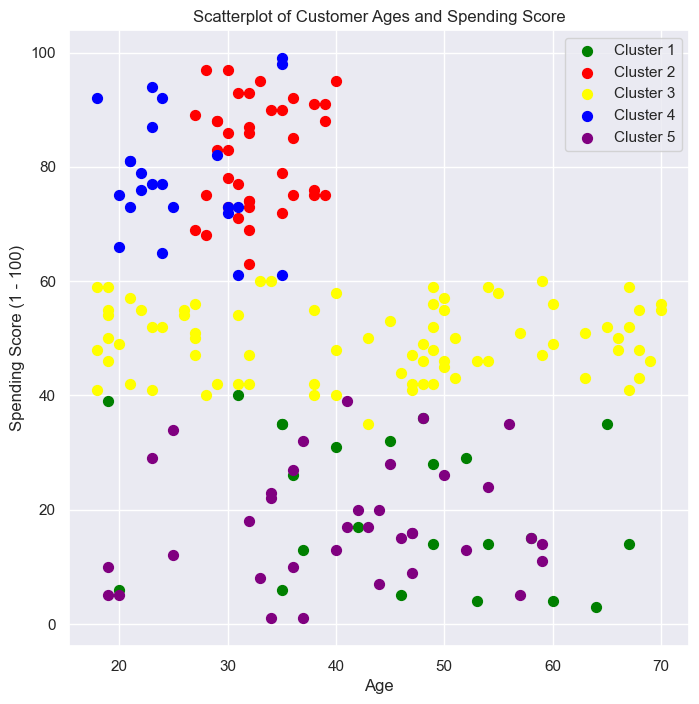

In [59]:
# plotting all the clusters
plt.figure(figsize = (8, 8))
plt.scatter(X_all[Y_all == 0, 1], X_all[Y_all == 0, 3], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X_all[Y_all == 1, 1], X_all[Y_all == 1, 3], s= 50, c = 'red', label = 'Cluster 2')
plt.scatter(X_all[Y_all == 2, 1], X_all[Y_all == 2, 3], s= 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X_all[Y_all == 3, 1], X_all[Y_all == 3, 3], s= 50, c = 'blue', label = 'Cluster 4')
plt.scatter(X_all[Y_all == 4, 1], X_all[Y_all == 4, 3], s= 50, c = 'purple', label = 'Cluster 5')

plt.title('Scatterplot of Customer Ages and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()

plt.show()

The scatterplot displays customers by their ages and spending score. The graph color codes the groups in the data. Notice that K means clustering used the other two variables as well. 

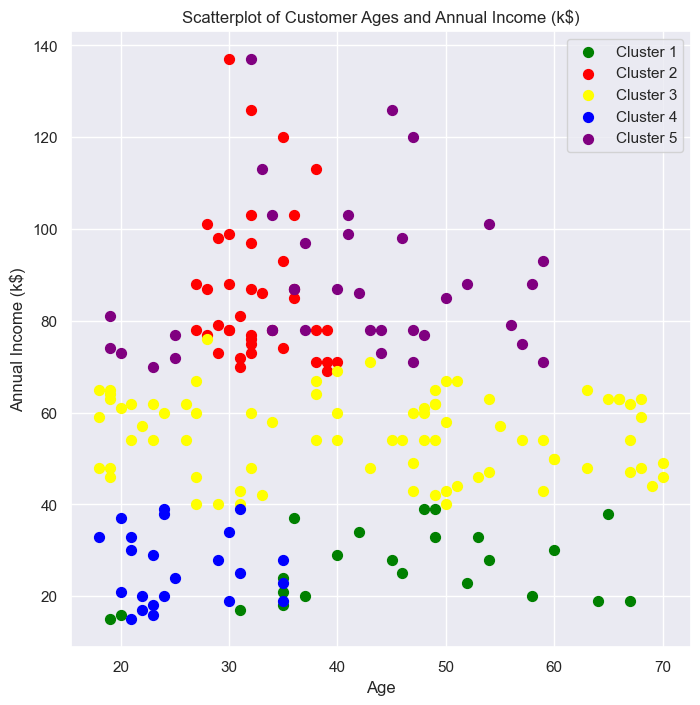

In [60]:
# plotting all the clusters
plt.figure(figsize = (8, 8))
plt.scatter(X_all[Y_all == 0, 1], X_all[Y_all == 0, 2], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X_all[Y_all == 1, 1], X_all[Y_all == 1, 2], s= 50, c = 'red', label = 'Cluster 2')
plt.scatter(X_all[Y_all == 2, 1], X_all[Y_all == 2, 2], s= 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X_all[Y_all == 3, 1], X_all[Y_all == 3, 2], s= 50, c = 'blue', label = 'Cluster 4')
plt.scatter(X_all[Y_all == 4, 1], X_all[Y_all == 4, 2], s= 50, c = 'purple', label = 'Cluster 5')

plt.title('Scatterplot of Customer Ages and Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

plt.show()

### Model Evaluation

Typically, we can't evaluate clustering since evaluating means that we know the correct cluster labels (i.e. we know which cluster each datapoint belongs to), while clustering usually is associated with unsupervised learning. 

However, I found an article introducing methods on evaluating clustering on an application for reference, as shown below. More details can be found in the article.

### Evaluation of clustering

Typical objective functions in clustering formalize the goal of attaining high **intra-cluster similarity** (documents within a cluster are similar) and low **inter-cluster similarity** (documents from different clusters are dissimilar). This is an **internal criterion** for the quality of a clustering. 

But good scores on an **internal criterion** do not necessarily translate into good effectiveness in an application. 

An alternative to internal criteria is **direct evaluation** in the application of interest. For search result clustering, we may want to measure the time it takes users to find an answer with different clustering algorithms. This is the most direct evaluation, but it is expensive, especially if large user studies are necessary.

As a surrogate for user judgments, we can use a set of classes in an **evaluation benchmark** or **gold standard**. The gold standard is ideally produced by human judges with a good level of **inter-judge agreement**. We can then compute an **external criterion** that evaluates how well the clustering matches the gold standard classes. 

Now let's introduce four **external criteria** of clustering quality. 

- *Purity* is a simple and transparent evaluation measure. 
- *Normalized mutual information* can be information-theoretically interpreted. 
- The *Rand index* penalizes both false positive and false negative decisions during clustering. 
- The *F measure* in addition supports differential weighting of these two types of errors.


*Reference: Evaluation of clustering. (n.d.). https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html*